In [109]:
#pip install kaggle
#kaggle datasets download ashishkumarak/netflix-reviews-playstore-daily-updated  데이터셋 다운로드 후 압출 풀기
import pandas as pd
import numpy as np

In [111]:
df = pd.read_csv('~/kaggle/netflix_reviews.csv')

In [113]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,"With basic plan, Netflix can consider to allow...",2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,Good app for series.,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,Laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,This app uses more data and it's asking withou...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,Since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908


In [115]:
df.tail()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117214,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117215,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117216,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117217,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117218,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


In [117]:
df.shape

(117219, 8)

In [119]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [121]:
#isinstance(object, classinfo) object 확인하고자 하는 데이터 값. classinfo 확인하고자 하는 데이터 타입. object와 classinfo 타입이 같으면 True, 다르면 False를 반환.
#re.sub(pattern, replace, text) text 중  pattern에 해당하는 부분을 replace로 대체
#strip() 공백 제거. ('제거할 문자')를 입력 해주면 제거 
# 전처리 함수
import re
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로 (반대로는 upper)
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거 r'' = \를 탈출문자로 보지 않고 \ 그대로 본다, '[]' = 문자의 집합, '^' = not, '\w' = 문자 + 숫자, '\s' = 공백문자
    text = re.sub(r'\d+', '', text)  # 숫자 제거  '\d' = 0~9를 포함한 모든 숫자, '+' = 바로 앞의 요소가 1회 이상 반복되는 부분과 일치
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [123]:
df['content'] = df['content'].apply(preprocess_text)  #apply 함수를 사용해서 content 컬럼에 preprocess_text 함수 적용

In [125]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,with basic plan netflix can consider to allow ...,2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,good app for series,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,this app uses more data and its asking without...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908


In [127]:
import seaborn as sns  #그래프 그리기 위한 라이브러리
import matplotlib.pyplot as plt  #그래프 표시를 위한 라이브러리

In [129]:
df_score, df_score_count = np.unique(df['score'], return_counts=True)  #unique함수로 고유값 확인, 개수까지 count

In [131]:
df_score  #score의 고유값은 1,2,3,4,5

array([1, 2, 3, 4, 5])

In [133]:
df_score_count   #고유값 1,2,3,4,5의 개수는 아래와 같다

array([46011, 11025, 12211, 14139, 33833])

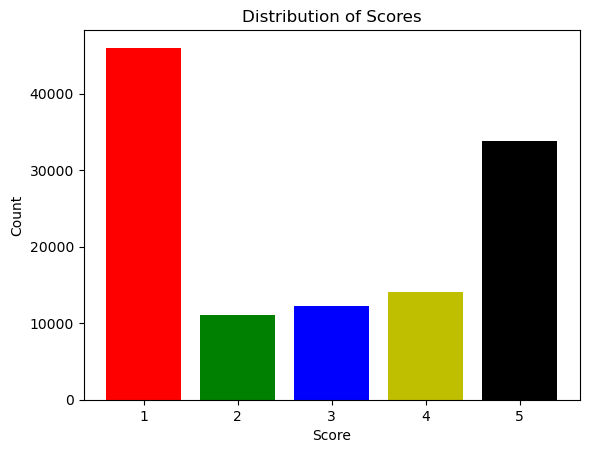

In [135]:
plt.bar(df_score, df_score_count, color = ['r', 'g', 'b', 'y', 'black'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show() 

In [137]:
score_sum = df.groupby('score')['score'].count()  #groupby(그룹기준컬럼)[통계기준컬럼].통계함수
score_sum_df = pd.DataFrame(score_sum)
score_sum_df.rename(columns = {'score' : 'score_count'}, inplace = True)
score_sum_df

,score_count
score,
1,46011
2,11025
3,12211
4,14139
5,33833


/var/folders/j9/nrfqzn3s2q349sv0cw_v64vm0000gn/T/ipykernel_37144/3947393202.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_sum_df, x = 'score', y = 'score_count', palette = "deep")  #barplot로도 그래프 만들 수 있다


Text(0.5, 1.0, 'Distribution of Scores')

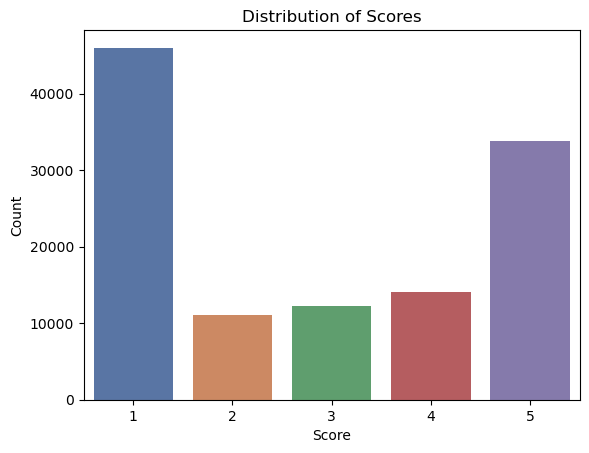

In [139]:
sns.barplot(data=score_sum_df, x = 'score', y = 'score_count', palette = "deep")  #barplot로도 그래프 만들 수 있다
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')

In [141]:
pip install nltk textblob gensim

Note: you may need to restart the kernel to use updated packages.


In [1]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


ImportError: cannot import name 'triu' from 'scipy.linalg' (/opt/anaconda3/lib/python3.12/site-packages/scipy/linalg/__init__.py)

In [32]:
#import에러 발생. Scipy에서 최근 기능을 제거 했기 때문에 버전을 낮춰야 함
#pip install scipy==1.12 입력

In [143]:
pip install scipy==1.12

Note: you may need to restart the kernel to use updated packages.


In [145]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  #polarity는 긍정단어를 +, 부정단어를 - 로 표현

In [147]:
df['sentiment'] =  df['content'].apply(get_sentiment)
df['sentiment']

0         0.000000
1         0.700000
2         0.000000
3         0.500000
4        -0.037879
            ...   
117214    0.350000
117215    0.450000
117216    0.005000
117217   -0.325000
117218    0.500000
Name: sentiment, Length: 117219, dtype: float64

In [148]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))  #lambda는 함수 이름 없이 동작하는 익명 함수
df[['content', 'score', 'sentiment_label']]  #sentiment 점수가 0.1보다 크면 positive, -0.1보다 작으면 negative, 나머지는 neutral

,content,score,sentiment_label
0,with basic plan netflix can consider to allow ...,2,neutral
1,good app for series,5,positive
2,laging wala mga movies na magaganda potangina ...,1,neutral
3,this app uses more data and its asking without...,1,positive
4,since the latest update i am not able to load ...,1,neutral
...,...,...,...
117214,i really like it there are so many movies and ...,5,positive
117215,i love netflix i always enjoy my time using it,5,positive
117216,sound quality is very slow of movies,1,neutral
117217,rate is very expensive bcos we see netflix sun...,1,negative


In [151]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [245]:
from wordcloud import WordCloud, STOPWORDS

#불용어를 먼저 제거
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone', 'watch', 'name', 'see', 'go', 'goes', 'dtype', 'appp'])

In [221]:
df_negative = df.groupby('sentiment_label').get_group('negative')  #sentiment_label로 그룹화 한 후 get_group으로 negative만 추출

In [219]:
df_negative['content']

7         this is a very useless appp because i cant use...
16        when you go to watch a movie on your phone it ...
22                                                worst app
24        it is not able to watch i can not see it i don...
25        to expensive for what little entertainment the...
                                ...                        
117180    it wont let me sign in so not a good time beca...
117191    add the other beyblade shows like evolution  q...
117194    this platform keeps getting worse and worse in...
117213    everytime i watch a show it goes so dark so i ...
117217    rate is very expensive bcos we see netflix sun...
Name: content, Length: 20126, dtype: object

In [225]:
negative_reviews = df_negative['content']
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

TypeError: expected string or bytes-like object, got 'Series'

In [227]:
#TypeError발생. str로 바꿔 줌.

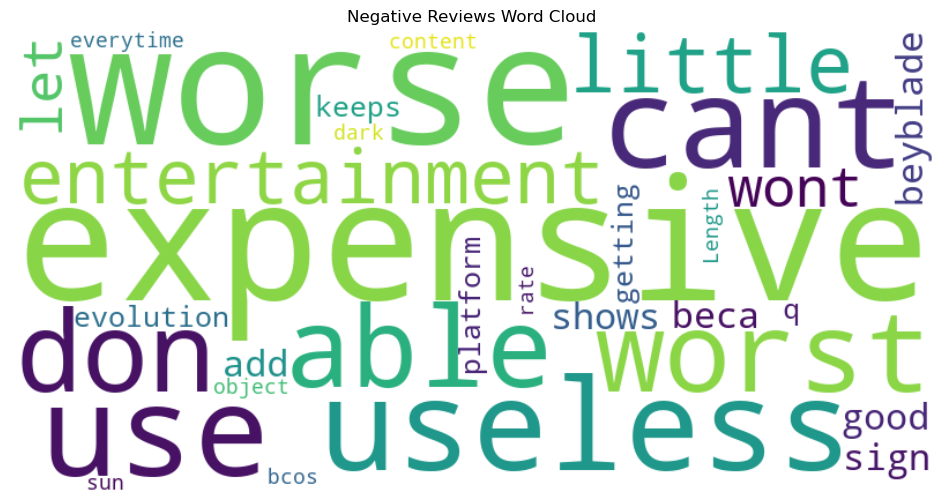

In [247]:
negative_reviews = str(df_negative['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

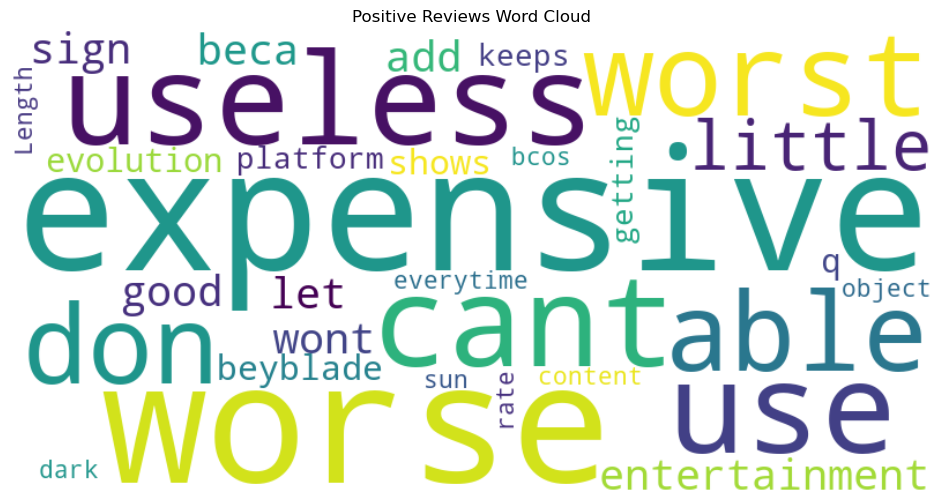

In [249]:
df_positive = df.groupby('sentiment_label').get_group('positive')
positive_reviews = str(df_positive['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()